In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Problem Statment

##### Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. With Random Forest  Non-Parametric Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.

##### The data that I have is from Automobile Insurance. I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answere between yes/no , that is a Binary Classification task. A comparison study has been performed to understand which ML algorithm suits best to the dataset.

##### Further it is found that the data is skewed and therefore upscaling and downscaling techniques have been performed to find accuracte results.

In [2]:
#load & view raw data
df = pd.read_csv('carclaims.csv')
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,"more than 69,000",6,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,No
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36,Third Party,Sport - Collision,Sport,"more than 69,000",7,14,400,1,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,No
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,"more than 69,000",8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30,Policy Holder,Sport - Collision,Sport,"more than 69,000",9,7,400,4,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,No
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,42,Policy Holder,Utility - All Perils,Utility,"more than 69,000",10,7,400,1,more than 30,more than 30,2 to 4,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,No


In [3]:
# Replace the Labels to 0 and 1
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

In [4]:
df.dtypes

,0
Month,object
WeekOfMonth,int64
DayOfWeek,object
Make,object
AccidentArea,object
DayOfWeekClaimed,object
MonthClaimed,object
WeekOfMonthClaimed,int64
Sex,object
MaritalStatus,object


In [5]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [6]:
df.shape

(15420, 33)

In [7]:
df.nunique()

,0
Month,12
WeekOfMonth,5
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
WeekOfMonthClaimed,5
Sex,2
MaritalStatus,4


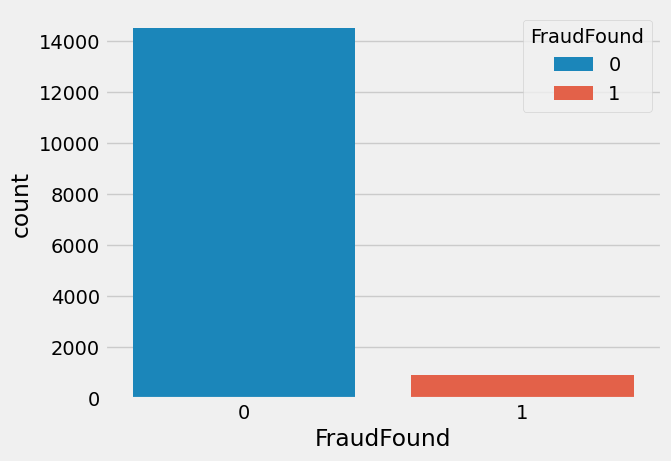

In [8]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='FraudFound', data=df, hue='FraudFound')

##### From abobe plot, like most fraud datasets, the label distribution is skewed.

In [9]:
df['FraudFound'].value_counts() # Count number of frauds vs non-frauds

,count
FraudFound,
0,14497
1,923


##### Here we see that almost 25% fraud reported.  Let’s try to look for an indicative variable. Let’s analyze location. This dataset only has information from the mid-Atlantic states from the USA.

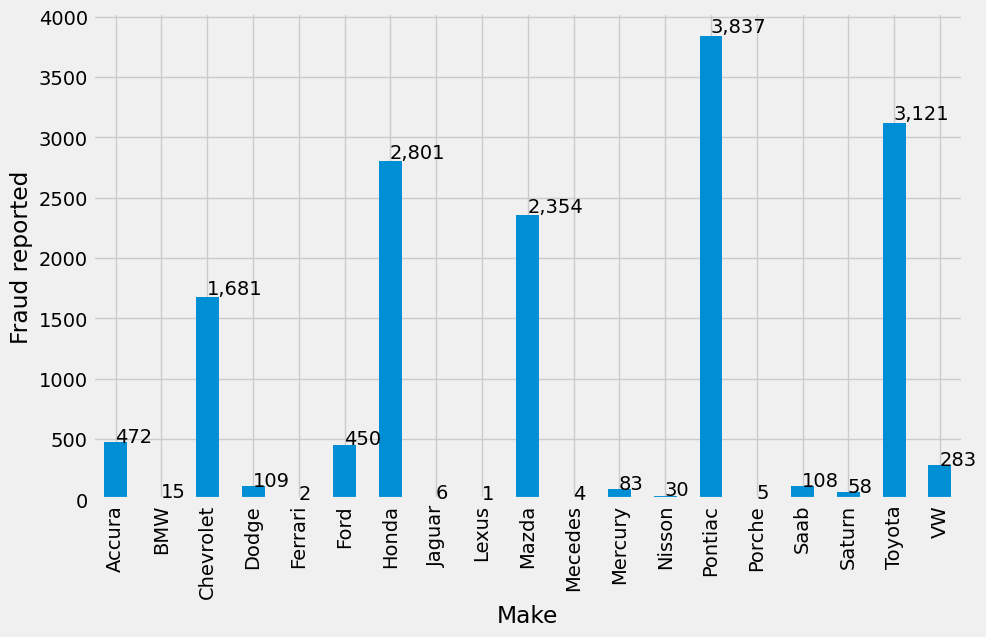

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('Make').FraudFound.count().plot.bar(ylim=0)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
ax.set_ylabel('Fraud reported')
plt.show()

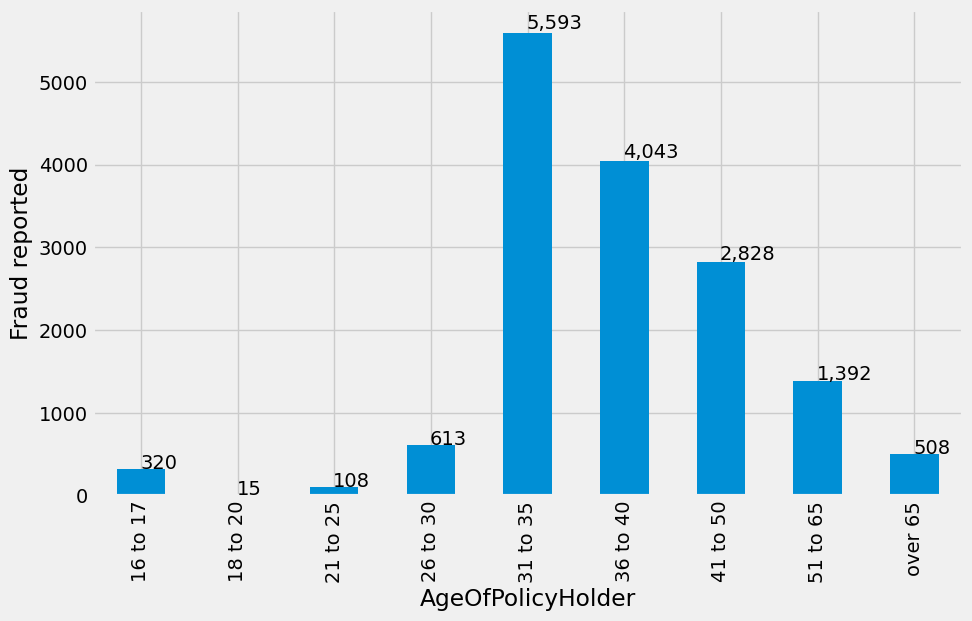

In [11]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('AgeOfPolicyHolder').FraudFound.count().plot.bar(ylim=0)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
ax.set_ylabel('Fraud reported')
plt.show()

##### From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number od fraud report.

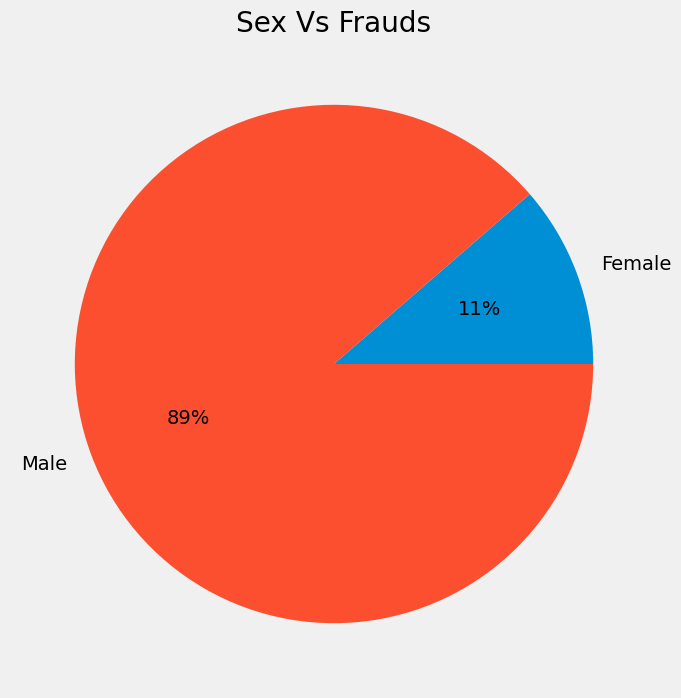

In [12]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Sex Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')

plt.show()


### Fraud by Men is more compared to Women


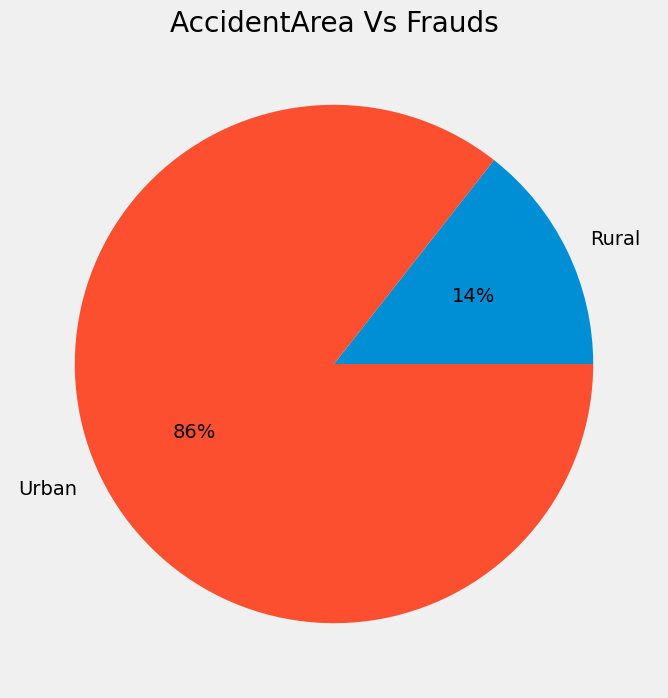

In [13]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("AccidentArea Vs Frauds")

plt.pie(accidentArea.values,labels=accidentArea.index,  autopct='%.0f%%')

plt.show()

### More Frauds in Urban Area


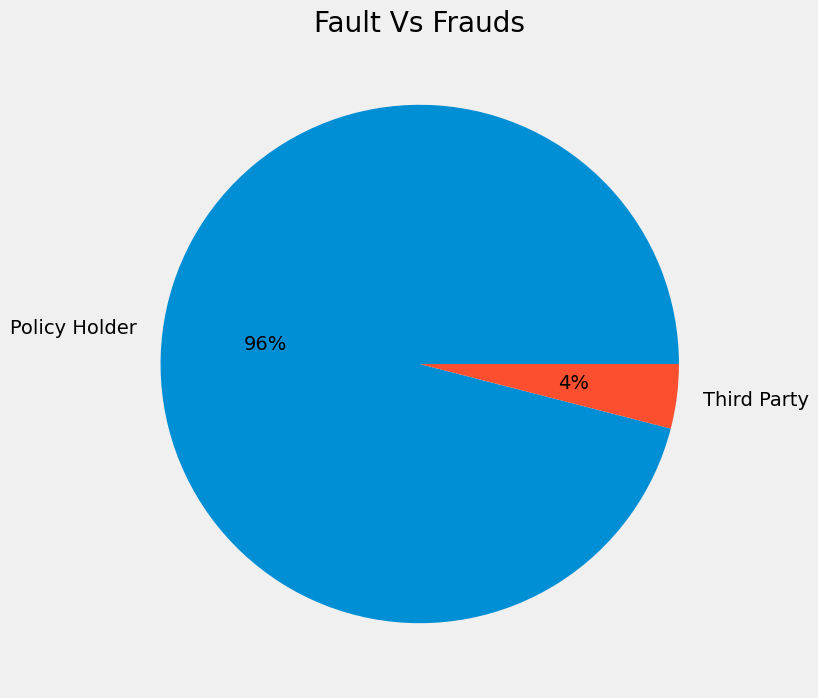

In [14]:
fault = df.groupby('Fault')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("Fault Vs Frauds")
plt.pie(fault.values,labels=fault.index,  autopct='%.0f%%')
plt.show()

### Clearly, Frauds are done more by Policy Holders

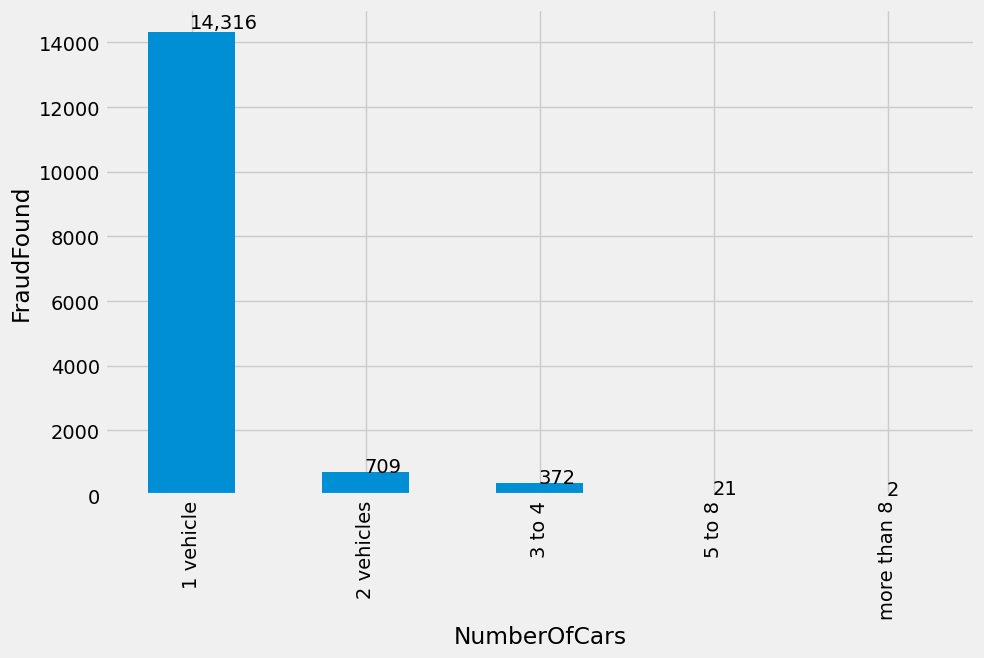

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('NumberOfCars').FraudFound.count().plot.bar(ylim=0)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
ax.set_ylabel('FraudFound')
plt.show()

In [16]:
df.nunique()

,0
Month,12
WeekOfMonth,5
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
WeekOfMonthClaimed,5
Sex,2
MaritalStatus,4


#### policy number has many unique values or levels . So it will make training the model very complex . we will drop this


In [17]:
df = df.drop(columns = ["PolicyNumber"])



In [18]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


In [19]:
df.dtypes

,0
Month,object
WeekOfMonth,int64
DayOfWeek,object
Make,object
AccidentArea,object
DayOfWeekClaimed,object
MonthClaimed,object
WeekOfMonthClaimed,int64
Sex,object
MaritalStatus,object


##### dropped columns on the basis of correlation matrix

In [20]:
df_new = df[['Make', 'AccidentArea','Sex',\
       'Fault', 'VehicleCategory',\
       'VehiclePrice', 'Year',\
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

In [21]:
df_new.head()

,Make,AccidentArea,Sex,Fault,VehicleCategory,VehiclePrice,Year,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
0,Honda,Urban,Female,Policy Holder,Sport,"more than 69,000",1994,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability,0
1,Honda,Urban,Male,Policy Holder,Sport,"more than 69,000",1994,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision,0
2,Honda,Urban,Male,Policy Holder,Sport,"more than 69,000",1994,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision,0
3,Toyota,Rural,Male,Third Party,Sport,"20,000 to 29,000",1994,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability,0
4,Honda,Urban,Female,Third Party,Sport,"more than 69,000",1994,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,0


In [22]:
df_new.dtypes

,0
Make,object
AccidentArea,object
Sex,object
Fault,object
VehicleCategory,object
VehiclePrice,object
Year,int64
DriverRating,int64
Days:Policy-Accident,object
Days:Policy-Claim,object


##One hot Encoding using pandas dataframe

In [25]:
dummies = pd.get_dummies(df_new[[
    'Make','AccidentArea','Sex','Fault','VehicleCategory','PoliceReportFiled','WitnessPresent','AgentType','BasePolicy']])
dummies = dummies.join(df_new[[
    'NumberOfSuppliments',
    'AgeOfPolicyHolder',
    'AgeOfVehicle',
    'VehiclePrice',
    'Days:Policy-Claim',
    'NumberOfCars',
    "FraudFound"]], rsuffix='_right') # Add a suffix to columns from the right DataFrame

In [26]:
dummies.head(10)

,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Rural,AccidentArea_Urban,Sex_Female,Sex_Male,Fault_Policy Holder,Fault_Third Party,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,NumberOfSuppliments,AgeOfPolicyHolder,AgeOfVehicle,VehiclePrice,Days:Policy-Claim,NumberOfCars,FraudFound
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,False,False,True,none,26 to 30,3 years,"more than 69,000",more than 30,3 to 4,0
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,True,False,True,False,False,True,False,none,31 to 35,6 years,"more than 69,000",more than 30,1 vehicle,0
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,False,True,False,none,41 to 50,7 years,"more than 69,000",more than 30,1 vehicle,0
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,more than 5,51 to 65,more than 7,"20,000 to 29,000",more than 30,1 vehicle,0
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,none,31 to 35,5 years,"more than 69,000",more than 30,1 vehicle,0
5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,3 to 5,21 to 25,5 years,"more than 69,000",more than 30,1 vehicle,0
6,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,1 to 2,36 to 40,7 years,"more than 69,000",more than 30,1 vehicle,0
7,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,False,True,False,none,16 to 17,new,"more than 69,000",more than 30,1 vehicle,0
8,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,True,False,False,True,True,False,False,True,False,3 to 5,31 to 35,6 years,"more than 69,000",more than 30,1 vehicle,0
9,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,True,False,True,False,True,False,True,False,False,3 to 5,36 to 40,more than 7,"more than 69,000",more than 30,1 vehicle,0


####Create train and test dataset

In [27]:
X = dummies.iloc[:, 0:-1]  # predictor variables
y = dummies.iloc[:, -1]  # target variable

In [28]:
X.head(2)

,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Rural,AccidentArea_Urban,Sex_Female,Sex_Male,Fault_Policy Holder,Fault_Third Party,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,NumberOfSuppliments,AgeOfPolicyHolder,AgeOfVehicle,VehiclePrice,Days:Policy-Claim,NumberOfCars
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,False,False,True,none,26 to 30,3 years,"more than 69,000",more than 30,3 to 4
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,True,False,True,False,False,True,False,none,31 to 35,6 years,"more than 69,000",more than 30,1 vehicle


In [29]:
y.head()

,FraudFound
0,0
1,0
2,0
3,0
4,0


####Label encoding for following colums -> Days:Policy-Claim , NumberOfSuppliments , AgeOfVehicle , VehiclePrice , AgeOfPolicyHolder

---



In [30]:
from sklearn.preprocessing import LabelEncoder
X['NumberOfSuppliments_en'] = LabelEncoder().fit_transform(X['NumberOfSuppliments'])
X[['NumberOfSuppliments', 'NumberOfSuppliments_en']]

X['Days:Policy-Claim_en'] = LabelEncoder().fit_transform(X['Days:Policy-Claim'])
X[['Days:Policy-Claim', 'Days:Policy-Claim_en']]

X['AgeOfPolicyHolder_en'] = LabelEncoder().fit_transform(X['AgeOfPolicyHolder'])
X[['AgeOfPolicyHolder', 'AgeOfPolicyHolder_en']]

X['VehiclePrice_en'] = LabelEncoder().fit_transform(X['VehiclePrice'])
X[['VehiclePrice', 'VehiclePrice_en']]

X['NumberOfCars_en'] = LabelEncoder().fit_transform(X['NumberOfCars'])
X[['NumberOfCars', 'NumberOfCars_en']]


X['AgeOfVehicle_en'] = LabelEncoder().fit_transform(X['AgeOfVehicle'])
X[['AgeOfVehicle', 'AgeOfVehicle_en']]



,AgeOfVehicle,AgeOfVehicle_en
0,3 years,1
1,6 years,4
2,7 years,5
3,more than 7,6
4,5 years,3
...,...,...
15415,6 years,4
15416,6 years,4
15417,5 years,3
15418,2 years,0


In [31]:
X.head()

,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Rural,AccidentArea_Urban,Sex_Female,Sex_Male,Fault_Policy Holder,Fault_Third Party,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,NumberOfSuppliments,AgeOfPolicyHolder,AgeOfVehicle,VehiclePrice,Days:Policy-Claim,NumberOfCars,NumberOfSuppliments_en,Days:Policy-Claim_en,AgeOfPolicyHolder_en,VehiclePrice_en,NumberOfCars_en,AgeOfVehicle_en
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,False,False,True,none,26 to 30,3 years,"more than 69,000",more than 30,3 to 4,3,2,3,5,2,1
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,True,False,True,False,False,True,False,none,31 to 35,6 years,"more than 69,000",more than 30,1 vehicle,3,2,4,5,0,4
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,False,True,False,none,41 to 50,7 years,"more than 69,000",more than 30,1 vehicle,3,2,6,5,0,5
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,more than 5,51 to 65,more than 7,"20,000 to 29,000",more than 30,1 vehicle,2,2,7,0,0,6
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,none,31 to 35,5 years,"more than 69,000",more than 30,1 vehicle,3,2,4,5,0,3


In [32]:
#final table
X = X.drop(['NumberOfSuppliments', 'AgeOfPolicyHolder','AgeOfVehicle','VehiclePrice','Days:Policy-Claim','NumberOfCars'], axis=1)
X.head()


,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Rural,AccidentArea_Urban,Sex_Female,Sex_Male,Fault_Policy Holder,Fault_Third Party,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,NumberOfSuppliments_en,Days:Policy-Claim_en,AgeOfPolicyHolder_en,VehiclePrice_en,NumberOfCars_en,AgeOfVehicle_en
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,False,False,True,3,2,3,5,2,1
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,True,False,True,False,False,True,False,3,2,4,5,0,4
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,False,True,False,3,2,6,5,0,5
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,2,2,7,0,0,6
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,3,2,4,5,0,3


In [33]:
X = X.astype(int)

X.head(10)

,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Rural,AccidentArea_Urban,Sex_Female,Sex_Male,Fault_Policy Holder,Fault_Third Party,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,NumberOfSuppliments_en,Days:Policy-Claim_en,AgeOfPolicyHolder_en,VehiclePrice_en,NumberOfCars_en,AgeOfVehicle_en
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,3,2,3,5,2,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,3,2,4,5,0,4
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,3,2,6,5,0,5
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,2,2,7,0,0,6
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,3,2,4,5,0,3
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,2,2,5,0,3
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,2,5,5,0,5
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,3,2,0,5,0,7
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,2,4,5,0,4
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,2,5,5,0,6


In [34]:
y.head()

,FraudFound
0,0
1,0
2,0
3,0
4,0


##### We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.

In [35]:
new_df = pd.concat([X,y], axis=1)
new_df.head(2)

,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Rural,AccidentArea_Urban,Sex_Female,Sex_Male,Fault_Policy Holder,Fault_Third Party,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,NumberOfSuppliments_en,Days:Policy-Claim_en,AgeOfPolicyHolder_en,VehiclePrice_en,NumberOfCars_en,AgeOfVehicle_en,FraudFound
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,3,2,3,5,2,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,3,2,4,5,0,4,0


####code to map values

In [36]:
# print("Unique values for Days:Policy-Claim:", df_new['Days:Policy-Claim'].unique())
# print("Unique values for VehiclePrice:", df_new['VehiclePrice'].unique())
# print("Unique values for NumberOfSuppliments:", df_new['NumberOfSuppliments'].unique())
# print("Unique values for AgeOfPolicyHolder:", df_new['AgeOfPolicyHolder'].unique())
# print("Unique values for AgeOfVehicle", df_new['AgeOfVehicle'].unique())
# print("Unique values for NumberOfCars", df_new['AgeOfVehicle'].unique())
# print("Unique values for AddressChange-Claim", df_new['AddressChange-Claim'].unique())
# print("Unique values for NumberOfCars", df_new['NumberOfCars'].unique())


In [37]:
# import pandas as pd

# # Load the dataset
# df_new = pd.read_csv('carclaims.csv')

# # Mapping for Days:Policy-Claim
# days_policy_claim_mapping = {
#     'more than 30': 31,
#     '15 to 30': 22,  # Average of 15 and 30
#     '8 to 15': 11,    # Average of 8 and 15
#     'none': 0
# }

# # Mapping for VehiclePrice
# vehicle_price_mapping = {
#     'more than 69,000': 70000,
#     '20,000 to 29,000': 25000,  # Average of 20,000 and 29,000
#     '30,000 to 39,000': 35000,  # Average of 30,000 and 39,000
#     'less than 20,000': 15000,   # Assuming a value below 20,000
#     '40,000 to 59,000': 50000,   # Average of 40,000 and 59,000
#     '60,000 to 69,000': 65000    # Average of 60,000 and 69,000
# }

# # Mapping for NumberOfSuppliments
# number_of_suppliments_mapping = {
#     'none': 0,
#     'more than 5': 6,  # Assuming more than 5 means 6
#     '3 to 5': 4,       # Average of 3 and 5
#     '1 to 2': 1        # Assuming 1 to 2 means 1
# }

# # Mapping for AgeOfPolicyHolder
# age_of_policy_holder_mapping = {
#     '26 to 30': 28,  # Average of 26 and 30
#     '31 to 35': 33,  # Average of 31 and 35
#     '41 to 50': 45,  # Average of 41 and 50
#     '51 to 65': 58,  # Average of 51 and 65
#     '21 to 25': 23,  # Average of 21 and 25
#     '36 to 40': 38,  # Average of 36 and 40
#     '16 to 17': 17,  # Assuming 17
#     'over 65': 70,   # Assuming a value above 65
#     '18 to 20': 19    # Assuming 19
# }
# # Mapping for AgeOfVehicle
# age_of_vehicle_mapping = {
#     '3 years': 3,
#     '6 years': 6,
#     '7 years': 7,
#     'more than 7': 8,  # Assuming 'more than 7' means 8 years
#     '5 years': 5,
#     'new': 0,
#     '4 years': 4,
#     '2 years': 2
# }

# address_change_claim_mapping = {
#     '1 year': 1,
#     'no change': 0,
#     '4 to 8 years': 6,  # Average of 4 and 8
#     '2 to 3 years': 2,   # Assuming 2 years for simplicity
#     'under 6 months': 0  # Assuming 'under 6 months' means no change
# }

# number_of_cars_mapping = {
#     '1 vehicle': 1,/
#     '2 vehicles': 2,
#     '3 to 4': 3,  # Assuming an average of 3.5, but rounding down to 3 for simplicity
#     '5 to 8': 6,   # Assuming an average of 5 and 8
#     'more than 8': 9  # Assuming more than 8 means at least 9
# }

# # Apply mappings to the DataFrame
# df_new['Days:Policy-Claim'] = df_new['Days:Policy-Claim'].map(days_policy_claim_mapping)
# df_new['VehiclePrice'] = df_new['VehiclePrice'].map(vehicle_price_mapping)
# df_new['NumberOfSuppliments'] = df_new['NumberOfSuppliments'].map(number_of_suppliments_mapping)
# df_new['AgeOfPolicyHolder'] = df_new['AgeOfPolicyHolder'].map(age_of_policy_holder_mapping)
# df_new['AgeOfVehicle'] = df_new['AgeOfVehicle'].map(age_of_vehicle_mapping)
# df_new['AddressChange-Claim'] = df_new['AddressChange-Claim'].map(address_change_claim_mapping)
# df_new['NumberOfCars'] = df_new['NumberOfCars'].map(number_of_cars_mapping)


# # Display the transformed DataFrame
# print(df_new[['Days:Policy-Claim', 'VehiclePrice', 'NumberOfSuppliments', 'AgeOfPolicyHolder','AgeOfVehicle','AddressChange-Claim']].head())

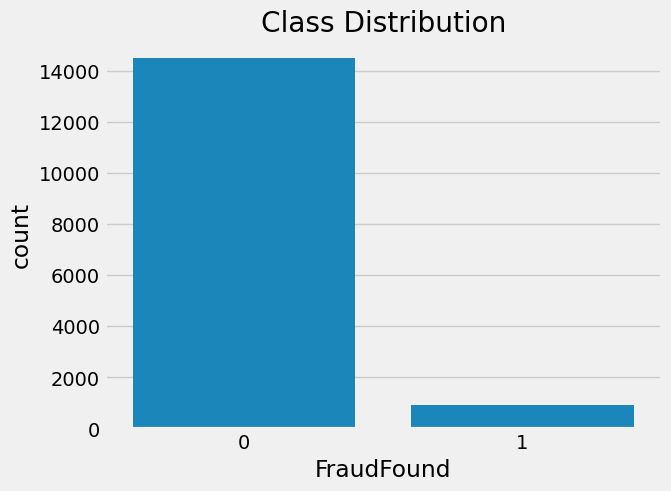

FraudFound
0    14497
1      923
Name: count, dtype: int64


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of target classes
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

# Display counts of each class
print(y.value_counts())


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  12336 3084
length of y_train and y_test:  12336 3084


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


# Instantiate the model
lr = LogisticRegression(random_state=7)

# Fit the model
lr.fit(X_train, y_train)

# Predict using the test set
y_pred = lr.predict(X_test)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Linear Regression model:", accuracy)

Accuracy of the Linear Regression model: 0.943579766536965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[2910    0]
 [ 174    0]]


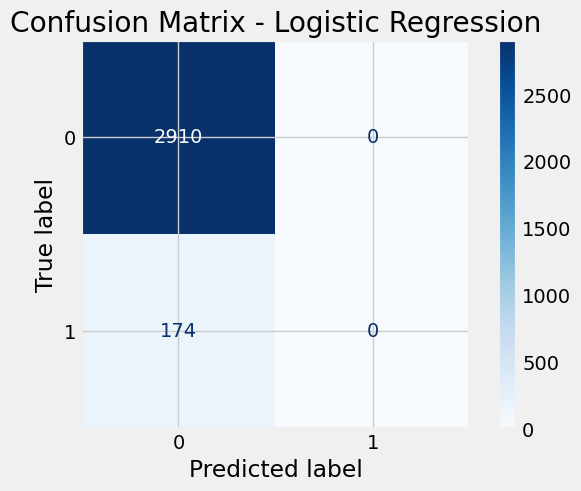

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Use ConfusionMatrixDisplay instead
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

RandomForest Classifier Accuracy: 0.93
Confusion Matrix - RandomForest:
 [[2860   50]
 [ 165    9]]


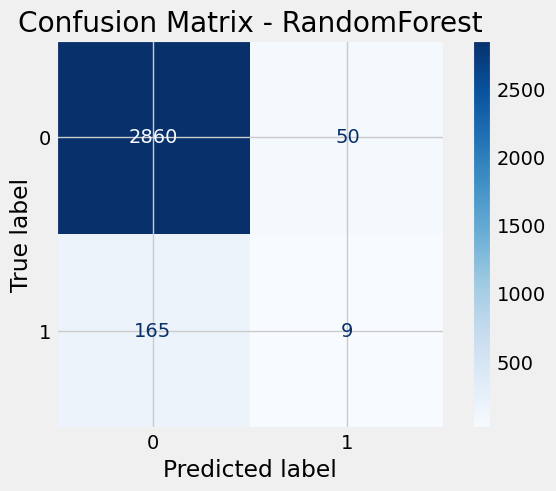

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=7)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest Classifier Accuracy: {accuracy_rf:.2f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - RandomForest:\n", cm_rf)

# Plot Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RandomForest')
plt.show()


Accuracy of the XGBoost model: 0.9406614785992218


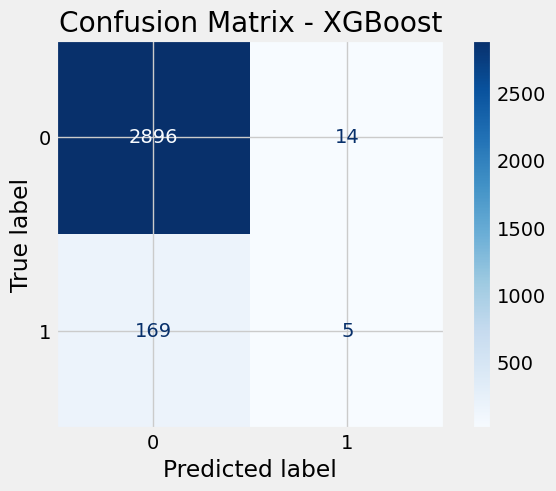

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Instantiate the model
xgb = XGBClassifier(random_state=7)

# Fit the model
xgb.fit(X_train, y_train)

# Predict using the test set
y_pred = xgb.predict(X_test)

# Print Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy of the XGBoost model:", accuracy_xgb)

# Optionally, you can also display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()


In [44]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Check the distribution of the target variable
n = new_df.FraudFound.value_counts()[0]

# Separate majority and minority classes
df_majority = new_df[new_df.FraudFound == 0]
df_minority = new_df[new_df.FraudFound == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=n,      # match number in majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.FraudFound.value_counts())

FraudFound
0    14497
1    14497
Name: count, dtype: int64


In [45]:
# Define the features (X) and the target (y)
X = df_upsampled.drop('FraudFound', axis=1)
y = df_upsampled['FraudFound']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21745, 43) (7249, 43) (21745,) (7249,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression:	 0.751000137950062


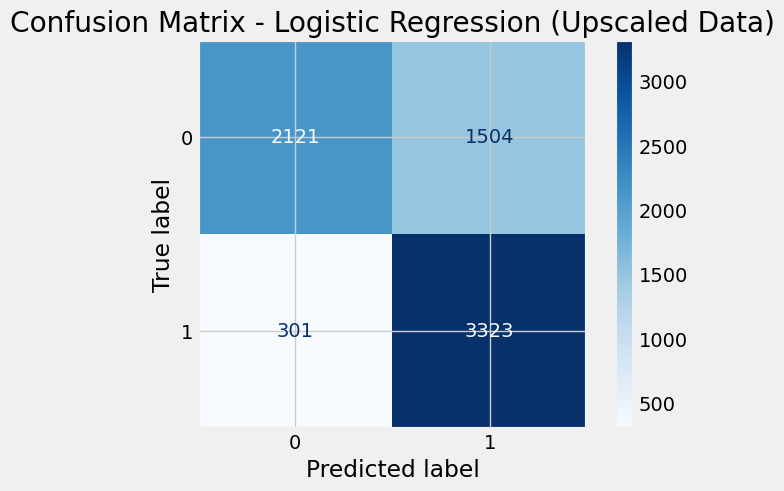

In [46]:
# Train and predict with Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_upscale_pred = lr.predict(X_test)

# Calculate and print accuracy for Logistic Regression
acc_lr_upscale = accuracy_score(y_test, lr_upscale_pred)
print("Accuracy of Logistic Regression:\t", acc_lr_upscale)

# Confusion Matrix for Logistic Regression
cm_lr_upscale = confusion_matrix(y_test, lr_upscale_pred)
disp_lr_upscale = ConfusionMatrixDisplay(confusion_matrix=cm_lr_upscale)
disp_lr_upscale.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression (Upscaled Data)')
plt.show()

Accuracy of RandomForest Classifier:	 0.9150227617602428


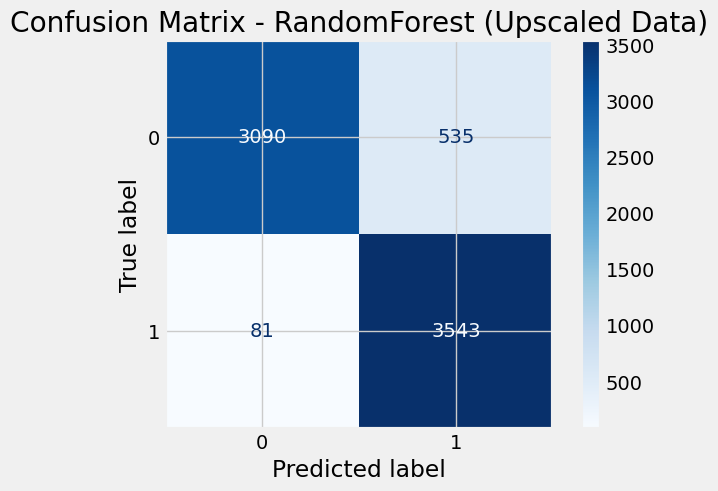

In [47]:
# Train and predict with RandomForest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_upscale_pred = rfc.predict(X_test)

# Calculate and print accuracy for RandomForest Classifier
acc_rfc_upscale = accuracy_score(y_test, rfc_upscale_pred)
print("Accuracy of RandomForest Classifier:\t", acc_rfc_upscale)

# Confusion Matrix for RandomForest Classifier
cm_rfc_upscale = confusion_matrix(y_test, rfc_upscale_pred)
disp_rfc_upscale = ConfusionMatrixDisplay(confusion_matrix=cm_rfc_upscale)
disp_rfc_upscale.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RandomForest (Upscaled Data)')
plt.show()

Accuracy of XGBoost Classifier:	 0.849496482273417


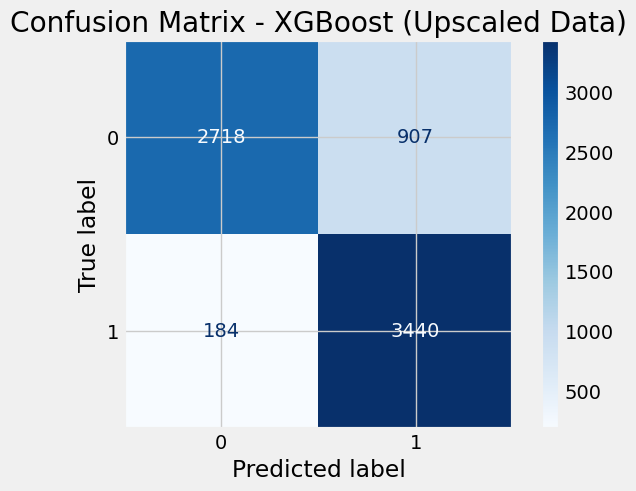

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train and predict with XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_upscale_pred = xgb.predict(X_test)

# Calculate and print accuracy for XGBoost Classifier
acc_xgb_upscale = accuracy_score(y_test, xgb_upscale_pred)
print("Accuracy of XGBoost Classifier:\t", acc_xgb_upscale)

# Confusion Matrix for XGBoost Classifier
cm_xgb_upscale = confusion_matrix(y_test, xgb_upscale_pred)
disp_xgb_upscale = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_upscale)
disp_xgb_upscale.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost (Upscaled Data)')
plt.show()


In [49]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe

# Get the number of instances in the minority class
n_minority = new_df['FraudFound'].value_counts()[1]  # Assuming 'fraud_reported' is the target variable

# Separate majority and minority classes
df_majority = new_df[new_df['FraudFound'] == 0]
df_minority = new_df[new_df['FraudFound'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # Sample without replacement
                                   n_samples=n_minority,  # Match number in minority class
                                   random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Display the new class counts
print(df_downsampled['FraudFound'].value_counts())


FraudFound
1    923
0    923
Name: count, dtype: int64


In [50]:
# Separate input features (X) and target variable (y)
X = df_downsampled.drop('FraudFound', axis=1)  # Dropping the target variable from the feature set
y = df_downsampled['FraudFound']  # Defining the target variable

# Convert categorical variables to numerical (if not done yet)
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1384, 43)
X_test shape: (462, 43)
y_train shape: (1384,)
y_test shape: (462,)


Accuracy of Logistic Regression after downsampling:	 0.7186147186147186


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


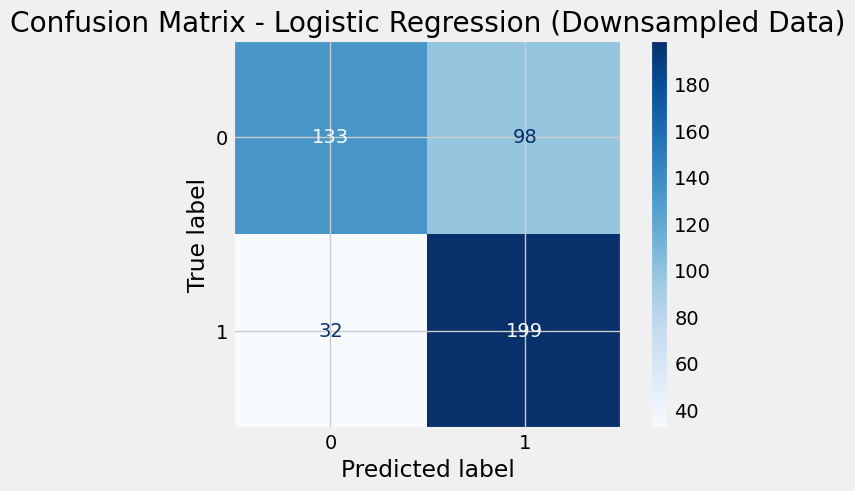

In [51]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_downscale_pred = lr.predict(X_test)

# Calculate and print accuracy for Logistic Regression
acc_lr_downscale = accuracy_score(y_test, lr_downscale_pred)
print("Accuracy of Logistic Regression after downsampling:\t", acc_lr_downscale)

# Confusion Matrix for Logistic Regression
cm_lr_downscale = confusion_matrix(y_test, lr_downscale_pred)
disp_lr_downscale = ConfusionMatrixDisplay(confusion_matrix=cm_lr_downscale)
disp_lr_downscale.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression (Downsampled Data)')
plt.show()

Accuracy of RandomForest Classifier after downsampling:	 0.6645021645021645


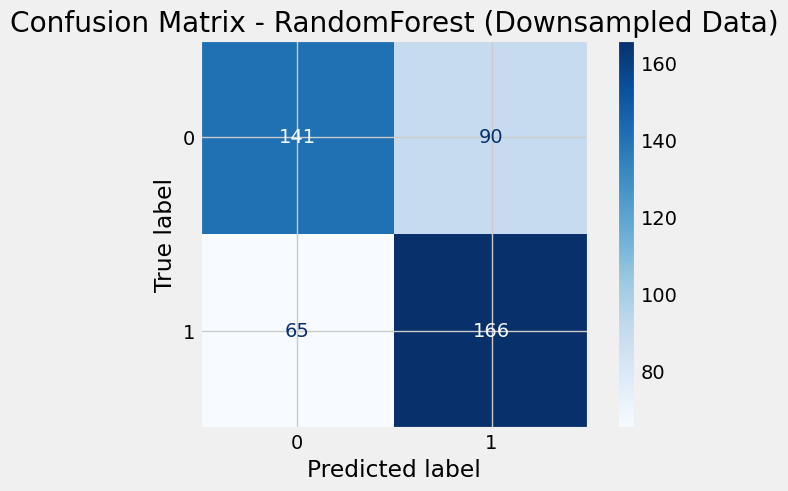

In [52]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_downscale_pred = rfc.predict(X_test)

# Calculate and print accuracy for RandomForest Classifier
acc_rfc_downscale = accuracy_score(y_test, rfc_downscale_pred)
print("Accuracy of RandomForest Classifier after downsampling:\t", acc_rfc_downscale)

# Confusion Matrix for RandomForest Classifier
cm_rfc_downscale = confusion_matrix(y_test, rfc_downscale_pred)
disp_rfc_downscale = ConfusionMatrixDisplay(confusion_matrix=cm_rfc_downscale)
disp_rfc_downscale.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RandomForest (Downsampled Data)')
plt.show()

Accuracy of XGBoost Classifier after downsampling:	 0.6883116883116883


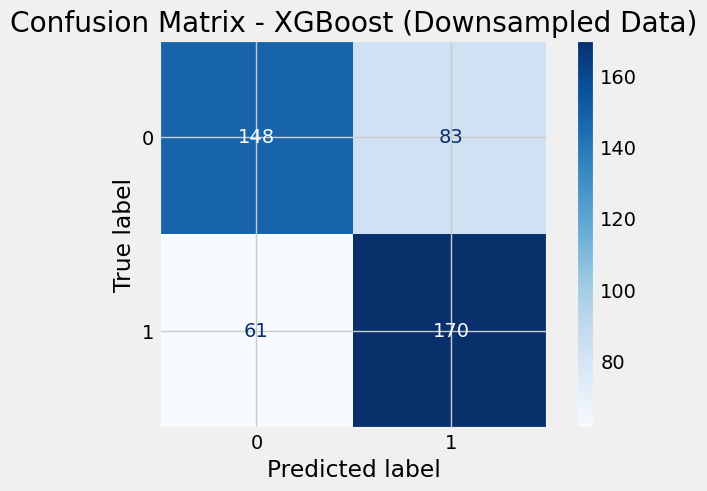

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train and predict with XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_downscale_pred = xgb.predict(X_test)

# Calculate and print accuracy for XGBoost Classifier
acc_xgb_downscale = accuracy_score(y_test, xgb_downscale_pred)
print("Accuracy of XGBoost Classifier after downsampling:\t", acc_xgb_downscale)

# Confusion Matrix for XGBoost Classifier
cm_xgb_downscale = confusion_matrix(y_test, xgb_downscale_pred)
disp_xgb_downscale = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_downscale)
disp_xgb_downscale.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost (Downsampled Data)')
plt.show()


In [54]:
data = {
    'Model': [
        'Logistic Regression',
        'UpScale Logistic Regression',
        'DownScale Logistic Regression',
        'RandomForest Classifier',
        'UpScale RandomForest Classifier',
        'DownScale RandomForest Classifier',
        'XgBoost Classifier',
        'UpScale XGBoost Classifier',
        'DownScale XGBoost Classifier'
    ],
    'Accuracy Score': [
        accuracy,          # Accuracy of Logistic Regression on original data
        acc_lr_upscale,    # Accuracy of Logistic Regression on upscaled data
        acc_lr_downscale,  # Accuracy of Logistic Regression on downscaled data
        accuracy_rf,        # Accuracy of RandomForest on original data
        acc_rfc_upscale,   # Accuracy of RandomForest on upscaled data
        acc_rfc_downscale,  # Accuracy of RandomForest on downscaled data
        accuracy_xgb,           # Accuracy of XgBoost on original data
        acc_xgb_upscale,   # Accuracy of XgBoost on upscaled data
        acc_xgb_downscale  # Accuracy of XgBoost on downscaled data
    ]
}

# Create a DataFrame for comparison
comparison_table = pd.DataFrame(data)

# Print the comparison table
print(comparison_table)

                               Model  Accuracy Score
0                Logistic Regression        0.943580
1        UpScale Logistic Regression        0.751000
2      DownScale Logistic Regression        0.718615
3            RandomForest Classifier        0.930285
4    UpScale RandomForest Classifier        0.915023
5  DownScale RandomForest Classifier        0.664502
6                 XgBoost Classifier        0.940661
7         UpScale XGBoost Classifier        0.849496
8       DownScale XGBoost Classifier        0.688312


##### We can see that out of three upscaled and downscaled models that we have applied , Upscaled Random Forest Classifier gives the best result with 91% accuracy.
